# Adult Data Set Analysis

This dataset analysis task is carried out by:
- Nuzha Musyafira - 05111640000014
- Ferdinand Jason Gondowijoyo - 05111640000033
- Nurlita Dhuha Fatmawati - 05111640000092
- Jonathan Rehuel Lewerissa - 05111640000105

## Introduction

On this dataset analysis task, we will analyze the Adult Data Set. The Adult Data Set (also known as the Census Dataset) is a dataset that aims to predict whether a person's income exceeds $50000 per year based on their census data. 

This data set can be downloaded from __[https://archive.ics.uci.edu/ml/datasets/adult](https://archive.ics.uci.edu/ml/datasets/adult)__.

## Preparation

Let’s first `import` some libraries that we are going to need for our analysis.

In [1]:
import math

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.preprocessing as preprocessing

from sklearn.impute import SimpleImputer

%matplotlib inline

Then, we need to read the adult dataset from `data/adult.csv`  which contains comma separated columns and mark the values `?` as missing data points

In [2]:
original_data = pd.read_csv(
    "data/adult.csv",
    names=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"],
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")

original_data.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Insight

First, we need to see the general statistical information of the dataset.

In [3]:
def summarize_data(df):
    print('Continuous Data : ')
    print(df.describe())
    print('\n\n')
    print('Categorical Data : ')
    for column in df.columns:
        if df.dtypes[column] == np.object : # Categorical Data
            print(column)
            print(df[column].value_counts())
        print()

summarize_data(original_data)

Continuous Data : 
                Age        fnlwgt  Education-Num  Capital Gain  Capital Loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours per week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  



Categorical Data : 

Workclass
Private   

### Data Dictionary
1. Categorial Attributes
    - workclass: (categorical) Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
        - Individual work category
    - education: (categorical) Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    - Individual's highest education degree
    - marital-status: (categorical) Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
        - Individual marital status
    - occupation: (categorical) Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
        - Individual's occupation
    - relationship: (categorical) Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
        - Individual's relation in a family
    - race: (categorical) White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
        - Race of Individual
    - sex: (categorical) Female, Male.
    - native-country: (categorical) United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
        - Individual's native country

2. Continuous Attributes
    - age: continuous.
        - Age of an individual
    - education-num: number of education year, continuous.
        - Individual's year of receiving education
    - fnlwgt: final weight, continuous.
        - The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.
    - capital-gain: continuous.
    - capital-loss: continuous.
    - hours-per-week: continuous.
        - Individual's working hour per week

Check if there are any NaNs in the dataframe and count every columns

In [4]:
original_data.isnull().sum()

Age                  0
Workclass         1836
fnlwgt               0
Education            0
Education-Num        0
Martial Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital Gain         0
Capital Loss         0
Hours per week       0
Country            583
Target               0
dtype: int64

### Histogram Analysis

A histogram is an accurate representation of the distribution of numerical data. It is an estimate of the probability distribution of a continuous variable (quantitative variable) and was first introduced by Karl Pearson. It differs from a bar graph, in the sense that a bar graph relates two variables, but a histogram relates only one. To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but are not required to be) of equal size.

Histogram can be summarized roughly as an inventory of what "kinds of items" you have and "how many of each kind" you have.  In computer vision, histogram appears a lot and many times helps to introduce some sort of robustness to your method. For example a bunch of techniques called local features/descriptors make use of the histogram of the image gradient in an image region. This summary representation helps you compare different images without being affected too much by variations in pixel values, shifts and tilts, etc. that change the individual pixel values significantly. So, histogram has the benefit of a summary data structure that is robust to certain changes that you want to ignore in the raw data.

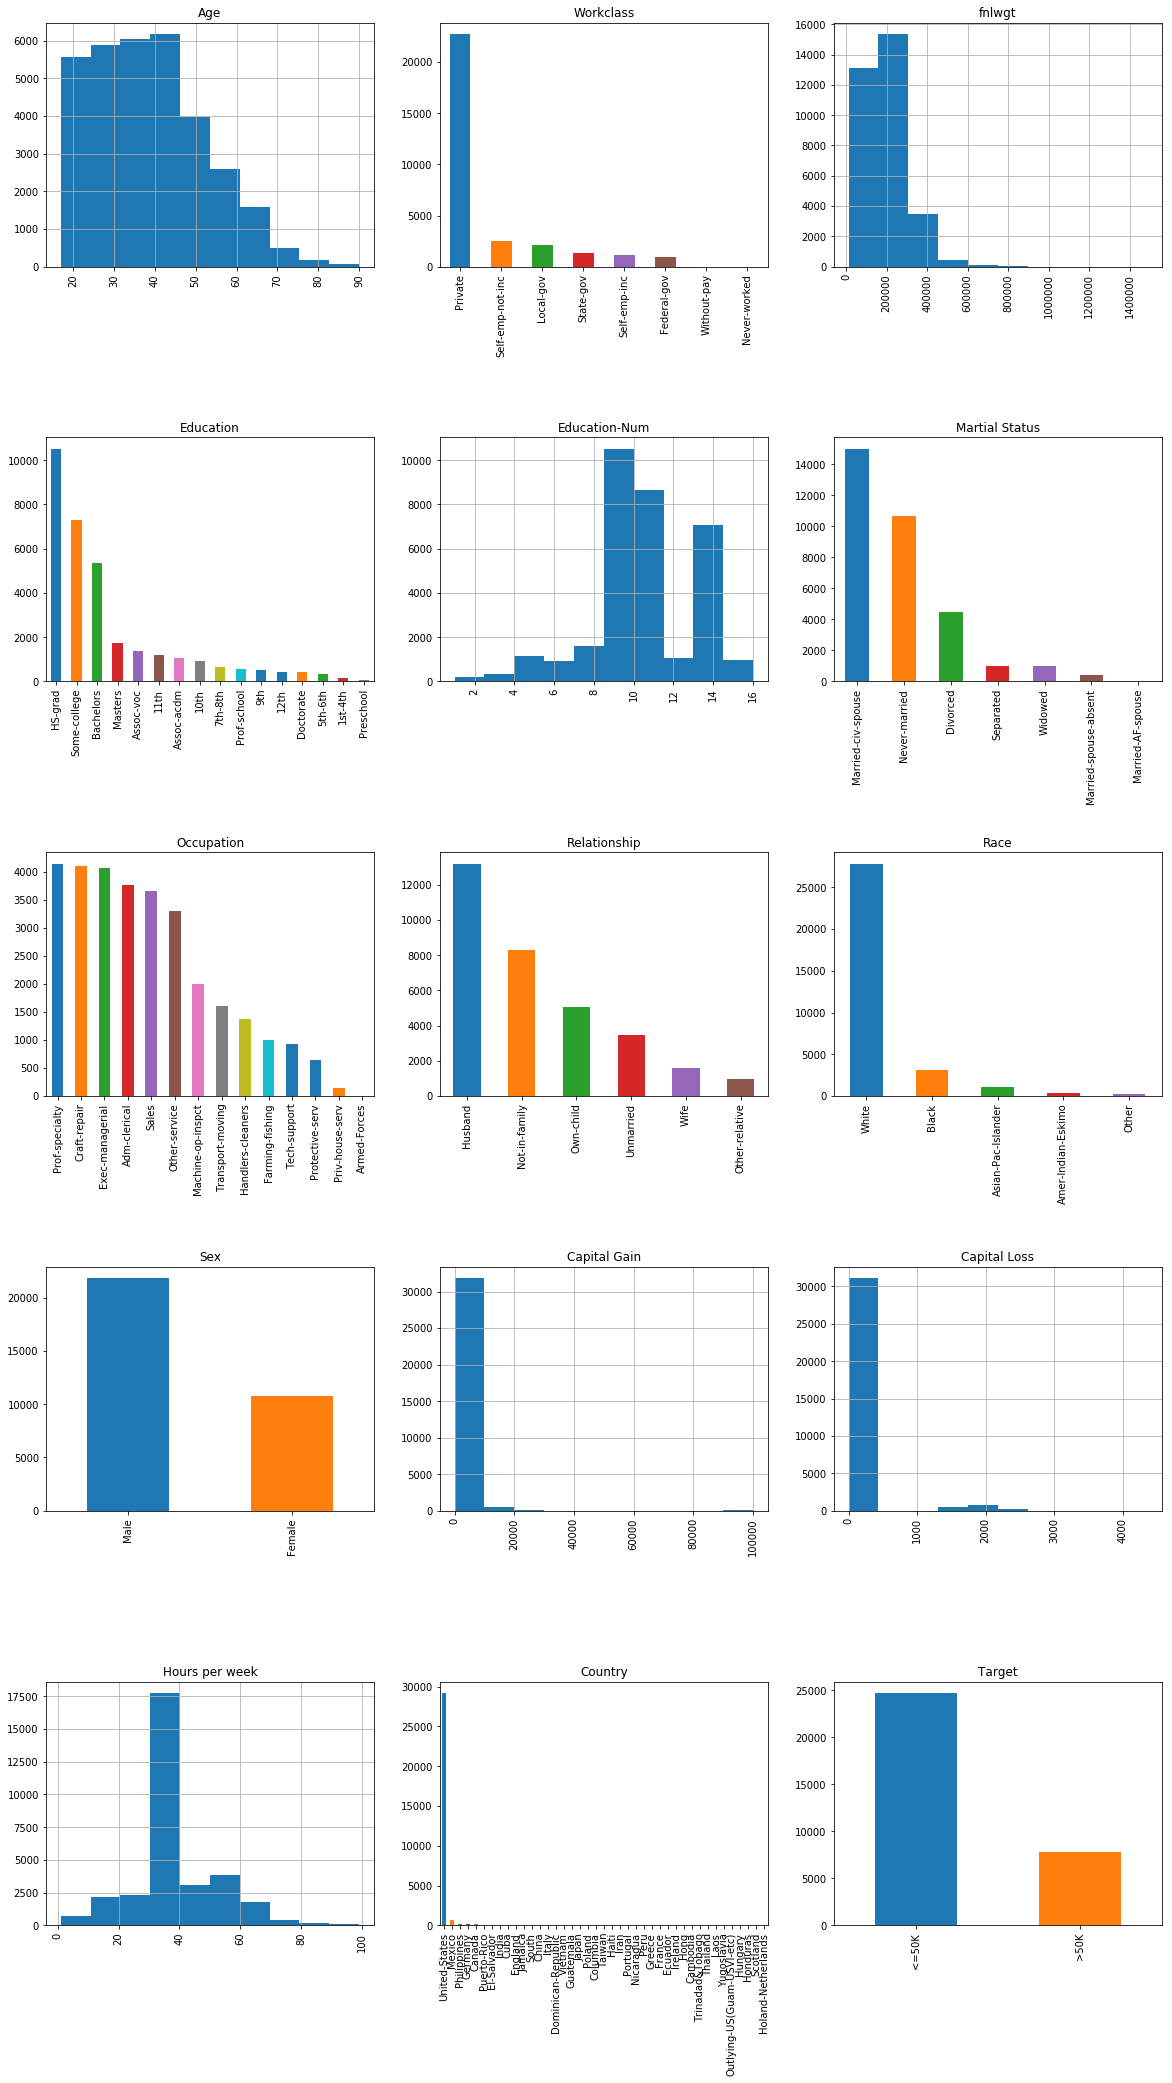

In [5]:
def make_histogram(df):
    fig = plt.figure(figsize=(20,35))
    COL = 3
    ROW = math.ceil(float(df.shape[1])/COL)
    
    for i , column in enumerate(df.columns):
        ax = fig.add_subplot(ROW, COL, i+1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            df[column].value_counts().plot(kind="bar", axes = ax)
        else:
            df[column].hist(axes = ax)
            plt.xticks(rotation="vertical")
            
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    
make_histogram(original_data)

The histograms above shows that all of the data do not have a normal distribution, therefore requiring special methods to deal with the missing value. 

The `Country` feature analysis is described below.

In [6]:
(original_data["Country"].value_counts() / original_data.shape[0]).head()

United-States    0.895857
Mexico           0.019748
Philippines      0.006081
Germany          0.004207
Canada           0.003716
Name: Country, dtype: float64

Indeed! 89% of the samples are for people from the US. Mexico comes next with less than 2%.

### Boxplot Analysis

Boxplot is a method for graphically depicting groups of numerical data through their quartiles. Box plots handle large data effortlessly, but they do not retain the exact values and the details of the results of the distribution. These graphs allow a clear summary of large amounts of data.

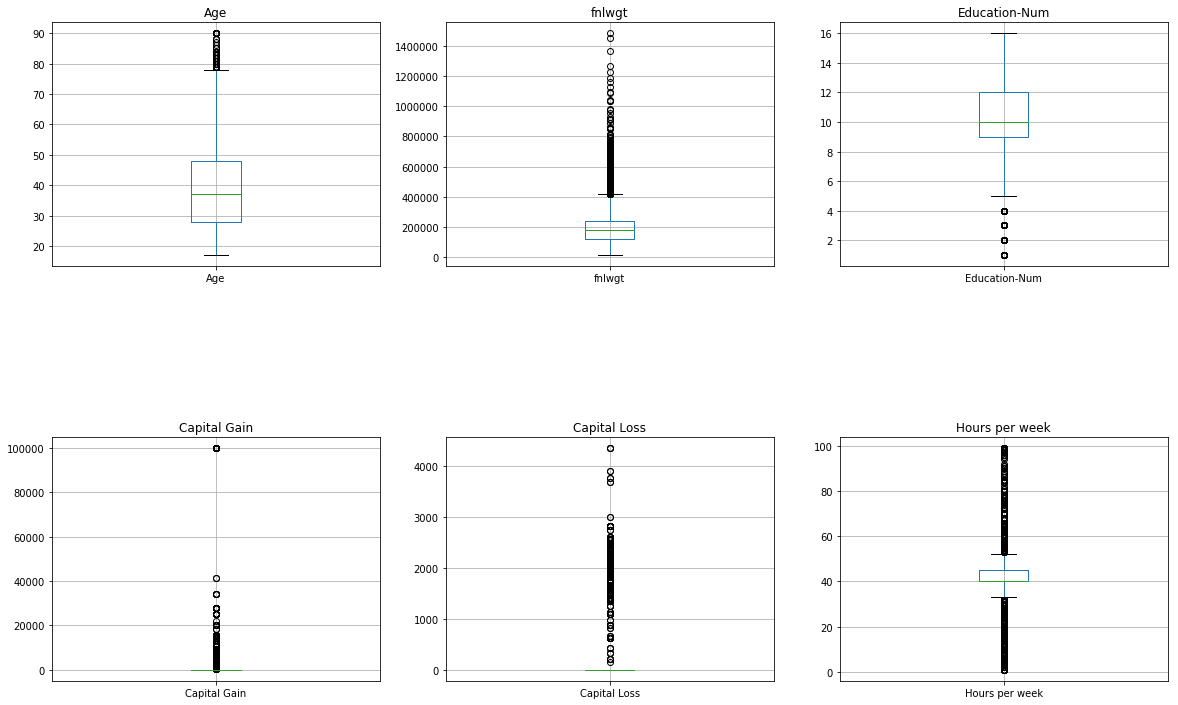

In [7]:
def make_boxplot(df):
    fig = plt.figure(figsize=(20,35))
    COL = 3
    ROW = math.ceil(float(df.shape[1])/COL)
    
    iterator = 1
    for column in df.columns:
        if df.dtypes[column] != np.object:
            ax = fig.add_subplot(ROW, COL, iterator)
            ax.set_title(column)
            pd.DataFrame(df[column], columns=[column]).boxplot()
            iterator+=1
            
    plt.subplots_adjust(hspace=0.7, wspace=0.2)
    plt.show()

make_boxplot(original_data)

The Boxplot shows that some of the data have many outlier values. This is still acceptable as the main data because these data are consisted of categorical data types.

### Correlation Analysis

We also need to do data correlation analysis to figure out the correlation between each feature inside the dataset. Below are the `pairplot` analysis of each features in the dataset. 

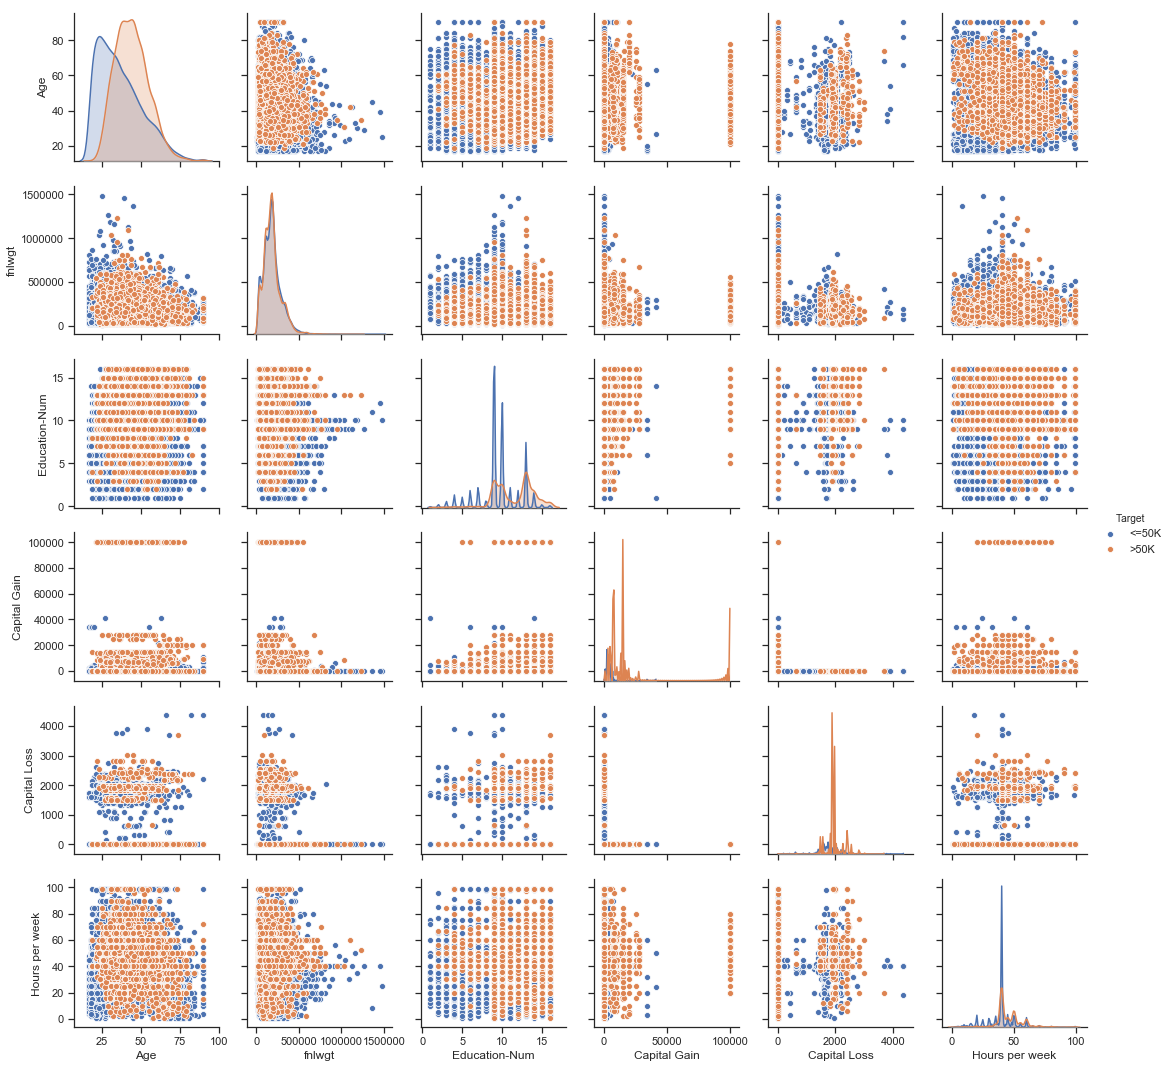

In [8]:
sns.set(style="ticks")
sns.pairplot(original_data, hue='Target')
plt.show()

Below are the data correlation analysis using `heatmap` analysis.

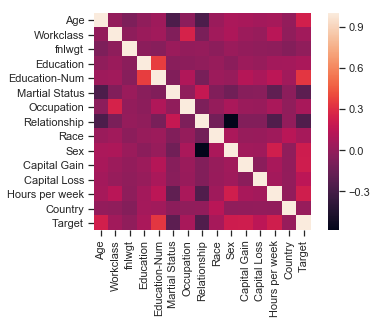

In [9]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column].fillna('0'))
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(original_data)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

The heatplot above shows that there is a high correlation between `Education` and `Education-Num`. 

In [10]:
original_data[["Education", "Education-Num"]].head(15)

,Education,Education-Num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
5,Masters,14
6,9th,5
7,HS-grad,9
8,Masters,14
9,Bachelors,13


Two columns `Education` and `Education-Num` actually represent the same features, but encoded as strings and as numbers. We don’t need the string representation, so we can just delete this column. Note that it is a much better option to delete the Education column as the Education-Num has the important property that the values are ordered: the higher the number, the higher the education that person has. This is a vaulable information a machine learning algorithm can use.

## Data Preprocessing

The preprocessing that will be carried out Imputation using `Simpleimputer`. To replace the missing values in the categorical data, we will use the mode or the most frequent value that appeared in each column. On the `SimpleInputer` method, this is carried out using the `strategy='most_frequent'` as the parameter.

In [11]:
imputer_modus = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_modus.fit(encoded_data)
imputed_data = imputer_modus.transform(encoded_data)

imputed_dataframe = pd.DataFrame(imputed_data,
    columns=["Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital Gain", "Capital Loss",
        "Hours per week", "Country", "Target"])
imputed_dataframe.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


## Dimension Reduction and Feature Selection

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Field Education and Education-Num represent the same feature, so we can drop one
imputed_dataframe = imputed_dataframe.drop('Education-Num',1)

feature_dataframe = imputed_dataframe.drop('Target',1)

sc = StandardScaler()
standard_feature_dataframe = sc.fit_transform(feature_dataframe.astype('float64'))

pca = PCA(n_components=9)
pca_feature_dataframe = pca.fit_transform(standard_feature_dataframe)

print(pca_feature_dataframe)

[[ 0.5337714  -0.39493063 -0.6220552  ... -1.00552596  0.50015204
  -0.50046056]
 [ 0.66687907  0.5029534  -0.36568703 ... -0.39188502  0.01897485
   1.12558712]
 [ 1.06911633  0.51214534 -0.24057531 ...  0.47167645 -0.93776789
  -0.10965327]
 ...
 [-2.03024128  0.86810381 -0.69871717 ... -0.11464943  0.52730064
  -0.17218598]
 [-1.61836372  0.16671829 -0.10959498 ... -0.36784778  0.31436225
   0.09759972]
 [-1.16746413  0.35941774 -1.01362921 ...  2.14186593  0.37297336
  -0.43719479]]


In [20]:
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import StratifiedKFold

## Handle Imbalanced Dataset 

In [24]:
dataframe_sampling = {}

def make_sampling_dataset(feature, target):
    global dataframe_sampling
    
    sm = SMOTE(ratio='auto', random_state=1)
    new_data_smote, new_target_smote = sm.fit_sample(feature, target)
    dataframe_sampling['SMOTE'] = {}
    dataframe_sampling['SMOTE']['feature'] = new_data_smote
    dataframe_sampling['SMOTE']['target'] = new_target_smote
    
    ada = ADASYN(ratio='auto', random_state=1)
    new_data_adasyn, new_target_adasyn = ada.fit_sample(feature, target)
    dataframe_sampling['ADASYN'] = {}
    dataframe_sampling['ADASYN']['feature'] = new_data_adasyn
    dataframe_sampling['ADASYN']['target'] = new_target_adasyn
    
    blsm = BorderlineSMOTE(random_state=1)
    new_data_blsmote, new_target_blsmote = blsm.fit_sample(feature, target)
    dataframe_sampling['BorderLineSMOTE'] = {}
    dataframe_sampling['BorderLineSMOTE']['feature'] = new_data_blsmote
    dataframe_sampling['BorderLineSMOTE']['target'] = new_target_blsmote
    
    t1 = TomekLinks(random_state=1, ratio='not minority')
    new_data_smote_tomek, new_target_smote_tomek = t1.fit_sample(new_data_smote, new_target_smote)
    dataframe_sampling['SMOTE_Tomek'] = {}
    dataframe_sampling['SMOTE_Tomek']['feature'] = new_data_smote_tomek
    dataframe_sampling['SMOTE_Tomek']['target'] = new_target_smote_tomek
    
    t2 = TomekLinks(random_state=1, ratio='not minority')
    new_data_adasyn_tomek, new_target_adasyn_tomek = t2.fit_sample(new_data_adasyn, new_target_adasyn)
    dataframe_sampling['ADASYN_Tomek'] = {}
    dataframe_sampling['ADASYN_Tomek']['feature'] = new_data_adasyn_tomek
    dataframe_sampling['ADASYN_Tomek']['target'] = new_target_adasyn_tomek
    
    t3 = TomekLinks(random_state=1, ratio='not minority')
    new_data_blsmote_tomek, new_target_blsmote_tomek = t3.fit_sample(new_data_blsmote, new_target_blsmote)
    dataframe_sampling['BorderLineSMOTE_Tomek'] = {}
    dataframe_sampling['BorderLineSMOTE_Tomek']['feature'] = new_data_blsmote_tomek
    dataframe_sampling['BorderLineSMOTE_Tomek']['target'] = new_target_blsmote_tomek
    
make_sampling_dataset(pca_feature_dataframe, imputed_dataframe['Target'])    

## Data Sampling and Classification

In [28]:
dataframe_result = {}

def sampling_and_classify(key, feature, target):
    global dataframe_result
    dataframe_result[key] = {}
    skf = StratifiedKFold(n_splits=5)
    rfc = RandomForestClassifier(n_estimators=10,random_state=1)
    
    dataframe_result[key]['accuracy'] = 0
    dataframe_result[key]['precision'] = 0
    dataframe_result[key]['recall'] = 0
    dataframe_result[key]['fmeasure'] = 0
    
    for train,test in skf.split(feature, target):
        rfc.fit(feature[train], target[train])
        predict = rfc.predict(feature[test])
        score = precision_recall_fscore_support(target[test], predict, average='binary')
        dataframe_result[key]['accuracy'] += accuracy_score(target[test], predict)
        dataframe_result[key]['precision'] += score[0]
        dataframe_result[key]['recall'] += score[1]
        dataframe_result[key]['fmeasure'] += score[2]
        
    dataframe_result[key]['accuracy'] /= 5
    dataframe_result[key]['precision'] /= 5
    dataframe_result[key]['recall'] /= 5
    dataframe_result[key]['fmeasure'] /= 5
    
    print('Accuracy = ', dataframe_result[key]['accuracy'])
    print('Precision = ', dataframe_result[key]['precision'])
    print('Recall = ', dataframe_result[key]['recall'])
    print('Fmeasure = ', dataframe_result[key]['fmeasure'])
    print()
    
for key in dataframe_sampling:
    print('Sampling and Classify : '+key)
    print()
    sampling_and_classify(key, dataframe_sampling[key]['feature'], dataframe_sampling[key]['target'])

Sampling and Classify : SMOTE
Accuracy =  0.8621359223300971
Precision =  0.8534218565767302
Recall =  0.8743527508090615
Fmeasure =  0.8636452529351129

Sampling and Classify : ADASYN
Accuracy =  0.8337017010531913
Precision =  0.8276550498800292
Recall =  0.8486008637448388
Fmeasure =  0.8376570707121006

Sampling and Classify : BorderLineSMOTE
Accuracy =  0.8661610032362459
Precision =  0.8458780418070084
Recall =  0.8951456310679612
Fmeasure =  0.8695331192802641

Sampling and Classify : SMOTE_Tomek
Accuracy =  0.8686012056810053
Precision =  0.8596030834501829
Recall =  0.8777617179434236
Fmeasure =  0.8685125008581988

Sampling and Classify : ADASYN_Tomek
Accuracy =  0.8387872682243577
Precision =  0.8326324660063961
Recall =  0.8501681292328774
Fmeasure =  0.8409220602015595

Sampling and Classify : BorderLineSMOTE_Tomek
Accuracy =  0.870731072481866
Precision =  0.8490500097905272
Recall =  0.8977046225778977
Fmeasure =  0.8725707837639772

